In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
datf = pd.read_csv('Data - Food Sales.csv', encoding = 'unicode_escape')

In [3]:
datf.shape

(244, 9)

In [4]:
datf.head(10)

,ID,Date,Region,City,Category,Product,Qty,UnitPrice,TotalPrice
0,ID07351,1-Jan,East,Boston,Bars,Carrot,33,1.77,58.41
1,ID07352,4-Jan,East,Boston,Crackers,Whole Wheat,87,3.49,303.63
2,ID07353,7-Jan,West,Los Angeles,Cookies,Chocolate Chip,58,1.87,108.46
3,ID07354,10-Jan,East,New York,Cookies,Chocolate Chip,82,1.87,153.34
4,ID07355,13-Jan,East,Boston,Cookies,Arrowroot,38,2.18,82.84
5,ID07356,16-Jan,East,Boston,Bars,Carrot,54,1.77,95.58
6,ID07357,19-Jan,East,Boston,Crackers,Whole Wheat,149,3.49,520.01
7,ID07358,22-Jan,West,Los Angeles,Bars,Carrot,51,1.77,90.27
8,ID07359,25-Jan,East,New York,Bars,Carrot,100,1.77,177.00
9,ID07360,28-Jan,East,New York,Snacks,Potato Chips,28,1.35,37.80


In [5]:
datf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          244 non-null    object 
 1   Date        244 non-null    object 
 2   Region      244 non-null    object 
 3   City        244 non-null    object 
 4   Category    244 non-null    object 
 5   Product     244 non-null    object 
 6   Qty         244 non-null    int64  
 7   UnitPrice   244 non-null    float64
 8   TotalPrice  244 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 17.3+ KB


In [6]:
# From above output we see that our data has no null value column.
# All columns have 244 non-null values.
# So Data Cleaning is not required.

In [7]:
# To further ensure that no null value is present we check for null values :

pd.isnull(datf).sum()

ID            0
Date          0
Region        0
City          0
Category      0
Product       0
Qty           0
UnitPrice     0
TotalPrice    0
dtype: int64

In [8]:
datf.columns

Index(['ID', 'Date', 'Region', 'City', 'Category', 'Product', 'Qty',
       'UnitPrice', 'TotalPrice'],
      dtype='object')

In [9]:
datf.rename(columns = {'UnitPrice' : 'Unit Price in Dollars'}, inplace = True)

In [10]:
datf.columns

Index(['ID', 'Date', 'Region', 'City', 'Category', 'Product', 'Qty',
       'Unit Price in Dollars', 'TotalPrice'],
      dtype='object')

In [11]:
datf.rename(columns = {'TotalPrice' : 'Total Price in Dollars'}, inplace = True)

In [12]:
datf.columns

Index(['ID', 'Date', 'Region', 'City', 'Category', 'Product', 'Qty',
       'Unit Price in Dollars', 'Total Price in Dollars'],
      dtype='object')

In [13]:
datf[['City', 'Category', 'Product', 'Unit Price in Dollars', 'Total Price in Dollars']].describe()

,Unit Price in Dollars,Total Price in Dollars
count,244.000000,244.000000
mean,2.200820,136.580246
std,0.600169,108.354231
min,1.350000,33.600000
25%,1.770000,72.570000
50%,1.870000,102.755000
75%,2.840000,159.300000
max,3.490000,817.920000


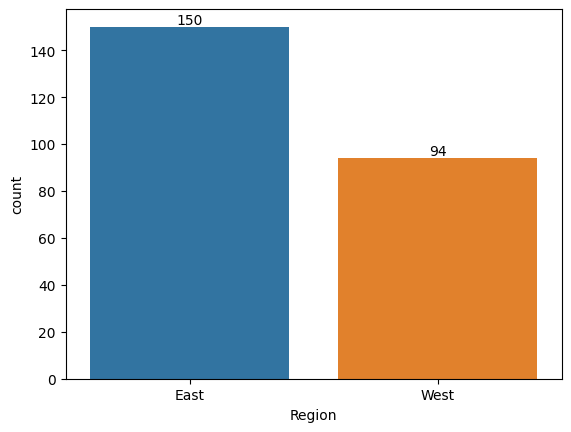

In [14]:
regx = sns.countplot(x = 'Region', data = datf)
for bars in regx.containers:
    regx.bar_label(bars)

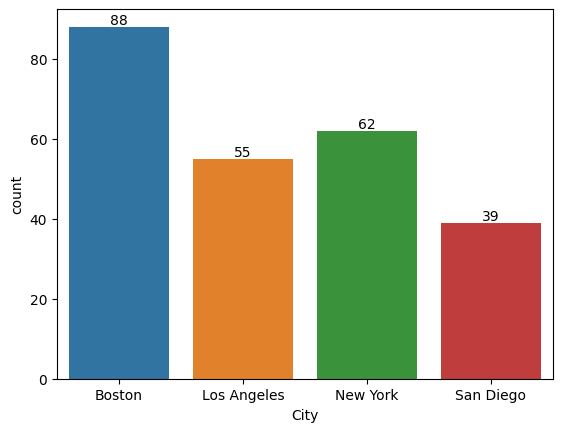

In [15]:
cx = sns.countplot(x = 'City', data = datf)
for bars in cx.containers:
    cx.bar_label(bars)

In [25]:
datf.query(f'City == "Boston"')

,ID,Date,Region,City,Category,Product,Qty,Unit Price in Dollars,Total Price in Dollars
0,ID07351,1-Jan,East,Boston,Bars,Carrot,33,1.77,58.41
1,ID07352,4-Jan,East,Boston,Crackers,Whole Wheat,87,3.49,303.63
4,ID07355,13-Jan,East,Boston,Cookies,Arrowroot,38,2.18,82.84
5,ID07356,16-Jan,East,Boston,Bars,Carrot,54,1.77,95.58
6,ID07357,19-Jan,East,Boston,Crackers,Whole Wheat,149,3.49,520.01
...,...,...,...,...,...,...,...,...,...
232,ID07583,27-Nov,East,Boston,Cookies,Chocolate Chip,211,1.87,394.57
233,ID07584,30-Nov,East,Boston,Crackers,Whole Wheat,20,3.49,69.80
239,ID07590,18-Dec,East,Boston,Cookies,Arrowroot,34,2.18,74.12
240,ID07591,21-Dec,East,Boston,Cookies,Chocolate Chip,245,1.87,458.15


In [26]:
# From the above analysis we find that maximum customers are from the City of Boston
# Boston is located in eastern region
# Eastern region has maximum customers

<Axes: xlabel='Category', ylabel='Total Price in Dollars'>

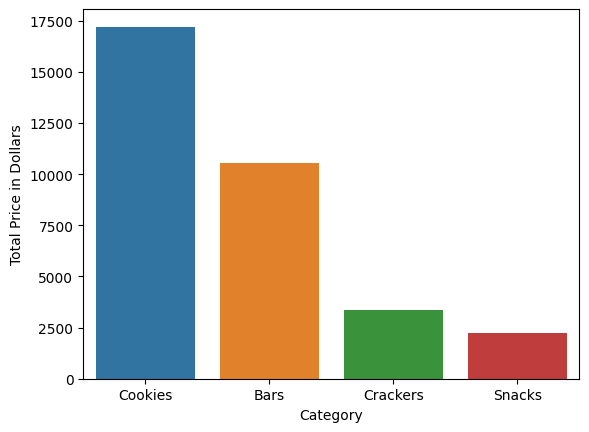

In [30]:
pdtsl = datf.groupby(['Category'], as_index = False)['Total Price in Dollars'].sum().sort_values(by = 'Total Price in Dollars', ascending = False)
sns.barplot(x='Category', y= 'Total Price in Dollars', data = pdtsl)

In [32]:
pdt = datf.groupby(['Product'], as_index = False)['Total Price in Dollars'].sum().sort_values(by = 'Total Price in Dollars', ascending = False)

pdt

,Product,Total Price in Dollars
3,Carrot,7410.99
5,Oatmeal Raisin,7310.16
0,Arrowroot,5330.10
4,Chocolate Chip,4572.15
8,Whole Wheat,3339.93
2,Bran,2945.25
6,Potato Chips,1651.77
7,Pretzels,585.90
1,Banana,179.33


In [33]:
datf.query(f'Product == "Carrot"')

,ID,Date,Region,City,Category,Product,Qty,Unit Price in Dollars,Total Price in Dollars
0,ID07351,1-Jan,East,Boston,Bars,Carrot,33,1.77,58.41
5,ID07356,16-Jan,East,Boston,Bars,Carrot,54,1.77,95.58
7,ID07358,22-Jan,West,Los Angeles,Bars,Carrot,51,1.77,90.27
8,ID07359,25-Jan,East,New York,Bars,Carrot,100,1.77,177.00
13,ID07364,9-Feb,West,Los Angeles,Bars,Carrot,44,1.77,77.88
...,...,...,...,...,...,...,...,...,...
219,ID07570,19-Oct,East,Boston,Bars,Carrot,43,1.77,76.11
221,ID07572,25-Oct,West,Los Angeles,Bars,Carrot,35,1.77,61.95
227,ID07578,12-Nov,West,Los Angeles,Bars,Carrot,137,1.77,242.49
230,ID07581,21-Nov,West,San Diego,Bars,Carrot,20,1.77,35.40


In [34]:
# From the above analysis we see that cookies category brings the highest revenue
# Whereas snacks category brings the lowest revenue
# But in terms of individual product "Carrot" of "Bars" generates the highest revenue

In [35]:
qty = datf.groupby(['Product'], as_index = False)['Qty'].sum().sort_values(by = 'Qty', ascending = False)

qty

,Product,Qty
3,Carrot,4187
5,Oatmeal Raisin,2574
0,Arrowroot,2445
4,Chocolate Chip,2445
2,Bran,1575
6,Potato Chips,994
8,Whole Wheat,957
7,Pretzels,186
1,Banana,79


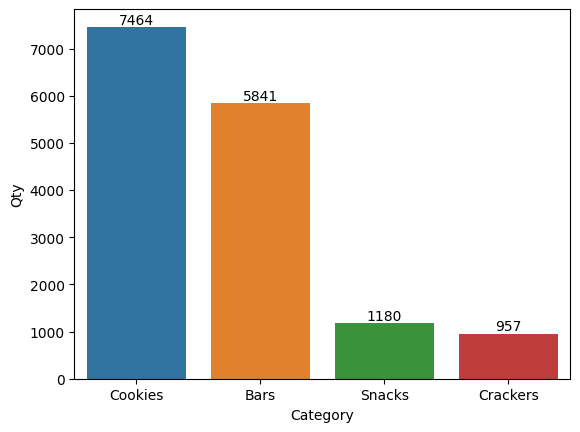

In [38]:
qtyc = datf.groupby(['Category'], as_index = False)['Qty'].sum().sort_values(by = 'Qty', ascending = False)
px = sns.barplot(x='Category', y= 'Qty', data = qtyc)
for bars in px.containers:
    px.bar_label(bars)

In [39]:
# From the above analysis we see that cookies category as whole constitutes the greatest number of items sold
# Where as individual product "Carrot" of "Bars" category has highest number of sales
# Cookies and Bars make up most of the sales hence may be assumed to have great demands
# Sncks and Crackers make only marginal sales hence may be assumed to have less demands

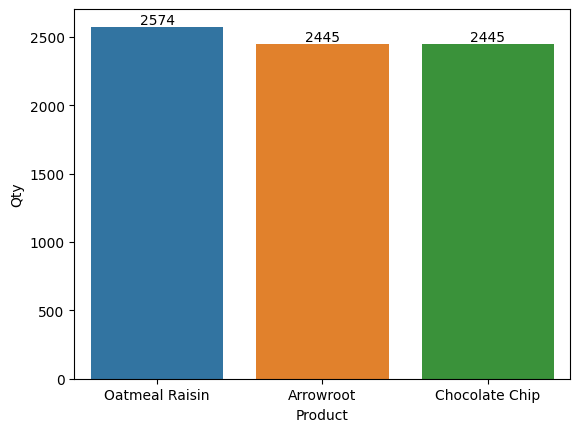

In [40]:
cookiesdb1 = datf.query(f'Category == "Cookies"')

cookiesdb2 = cookiesdb1. groupby(['Product'], as_index = False)['Qty'].sum().sort_values(by = 'Qty', ascending = False)

dx = sns.barplot(x='Product', y= 'Qty', data = cookiesdb2)
for bars in dx.containers:
    dx.bar_label(bars)

In [41]:
# From the above analysis we see that almost all products in the cookies category have nearly equal sales and hence demand.
# All the products have their individual sales greater than Snacks and Crackers Category

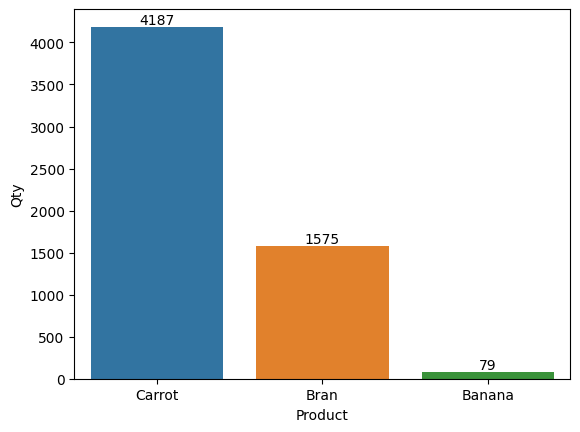

In [43]:
barsdb1 = datf.query(f'Category == "Bars"')

barsdb2 = barsdb1. groupby(['Product'], as_index = False)['Qty'].sum().sort_values(by = 'Qty', ascending = False)

ax = sns.barplot(x='Product', y= 'Qty', data = barsdb2)
for bars in ax.containers:
    ax.bar_label(bars)

In [44]:
# From the above analysis we see that in the 'Bars' Category Carrot has the maximum sale with 4187 units
# Bran product has a sale of 1575 units
# Banana has the least sale among the three with only 79 units

In [45]:
# From the above two comparisons we can safely say that maintaining a greater inventory of cookies can help to meet the demand.
# Also Banana units may be reduced as they are sold in very less quantity
# Carrot has nearly twice the sale compared to any product in the cookies category

# CONCLUSION


From the Data we could obtain the fact that the food store recieves greatest orders from the eastern city of Boston.
The Products of the cookies category bring the greatest revenue as well as sales in terms of units sold
All the products of cookies category have nearly similar number of units sold (each above 2000 units)
So it is safe to maintain a good inventory of cookies
Among all products Carrot of "Bars" category has the maximum revenue and units sold. But other products of "Bars" category donot have an equally sales record. So from "Bars" category Carrots may have more inventory and inventory of banana should be avoided

# Project Prepared By :

Name : Sagnik Deb

Email : sagnik6email@gmail.com

Institute : National Institute of Technology Agartala

THANK YOU